<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
import pandas_datareader.data as web
from pandas_datareader import data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time

# **6.1 Data Preparation**

# 5.1 (a) Get Data
* Read stock data use pandas_datareader.data from web

In [5]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = data.DataReader(stk_tickers, 'yahoo')
ccy_data = data.DataReader(ccy_tickers, 'fred')
idx_data = data.DataReader(idx_tickers, 'fred')



In [6]:
stk_data

Attributes   Adj Close              ...     Volume           
Symbols           MSFT         IBM  ...        IBM      GOOGL
Date                                ...                      
2017-02-27   59.957737  135.802719  ...  3861100.0  1010300.0
2017-02-28   59.724350  136.120651  ...  3423976.0  1383100.0
2017-03-01   60.620499  137.733017  ...  3143858.0  1818700.0
2017-03-02   59.752357  136.658112  ...  3052437.0  1250900.0
2017-03-03   59.976402  136.294754  ...  1905812.0  1005000.0
...                ...         ...  ...        ...        ...
2022-02-16  299.500000  129.179993  ...  4875600.0  1251100.0
2022-02-17  290.730011  124.970001  ...  6797000.0  1947500.0
2022-02-18  287.929993  124.349998  ...  4607600.0  2277400.0
2022-02-22  287.720001  123.919998  ...  5349700.0  2249500.0
2022-02-23  280.269989  122.070000  ...  4084500.0  1632800.0

[1258 rows x 18 columns]

In [7]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-02-27,112.01,1.2473
2017-02-28,112.06,1.2427
2017-03-01,113.66,1.2318
2017-03-02,114.45,1.2267
2017-03-03,114.60,1.2249
...,...,...
2022-02-14,115.72,1.3516
2022-02-15,115.64,1.3539
2022-02-16,115.41,1.3585


In [8]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-27,2369.75,20837.44,12.09
2017-02-28,2363.64,20812.24,12.92
2017-03-01,2395.96,21115.55,12.54
2017-03-02,2381.92,21002.97,11.81
2017-03-03,2383.12,21005.71,10.96
...,...,...,...
2022-02-17,4380.26,34312.03,28.11
2022-02-18,4348.87,34079.18,27.75
2022-02-21,NaN,NaN,NaN




*   Select columns



In [9]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [10]:
base

Date
2017-02-27     59.957737
2017-02-28     59.724350
2017-03-01     60.620499
2017-03-02     59.752357
2017-03-03     59.976402
                 ...    
2022-02-16    299.500000
2022-02-17    290.730011
2022-02-18    287.929993
2022-02-22    287.720001
2022-02-23    280.269989
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [11]:
X1

Attributes    Adj Close            
Symbols           GOOGL         IBM
Date                               
2017-02-27   849.669983  135.802719
2017-02-28   844.929993  136.120651
2017-03-01   856.750000  137.733017
2017-03-02   849.849976  136.658112
2017-03-03   849.080017  136.294754
...                 ...         ...
2022-02-16  2754.760010  129.179993
2022-02-17  2650.780029  124.970001
2022-02-18  2608.060059  124.349998
2022-02-22  2596.270020  123.919998
2022-02-23  2551.760010  122.070000

[1258 rows x 2 columns]

In [12]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-02-27,112.01,1.2473
2017-02-28,112.06,1.2427
2017-03-01,113.66,1.2318
2017-03-02,114.45,1.2267
2017-03-03,114.60,1.2249
...,...,...
2022-02-14,115.72,1.3516
2022-02-15,115.64,1.3539
2022-02-16,115.41,1.3585


In [13]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-27,2369.75,20837.44,12.09
2017-02-28,2363.64,20812.24,12.92
2017-03-01,2395.96,21115.55,12.54
2017-03-02,2381.92,21002.97,11.81
2017-03-03,2383.12,21005.71,10.96
...,...,...,...
2022-02-17,4380.26,34312.03,28.11
2022-02-18,4348.87,34079.18,27.75
2022-02-21,NaN,NaN,NaN


# 5.1 (b) Standardized Data
* Standardized data (X1, X2, X3) with kept index (date)

In [14]:
X1_scaler = preprocessing.StandardScaler()
X1_tranfrom = X1_scaler.fit_transform(X1)

X2_scaler = preprocessing.StandardScaler()
X2_tranfrom = X1_scaler.fit_transform(X2)

X3_scaler = preprocessing.StandardScaler()
X3_tranfrom = X1_scaler.fit_transform(X3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
#scaled_features_df = pd.DataFrame(X1_tranfrom,, index=X1.index, columns=X1.columns)

X1_tranfrom = pd.DataFrame(X1_tranfrom, index=X1.index,  columns = X1.columns)
X2_tranfrom = pd.DataFrame(X2_tranfrom, index=X2.index, columns = X2.columns)
X3_tranfrom = pd.DataFrame(X3_tranfrom, index=X3.index, columns = X3.columns)

In [16]:
X1_tranfrom

Attributes Adj Close          
Symbols        GOOGL       IBM
Date                          
2017-02-27 -1.065250  1.942070
2017-02-28 -1.073029  1.974309
2017-03-01 -1.053631  2.137803
2017-03-02 -1.064954  2.028807
2017-03-03 -1.066218  1.991963
...              ...       ...
2022-02-16  2.061184  1.270523
2022-02-17  1.890543  0.843628
2022-02-18  1.820435  0.780759
2022-02-22  1.801087  0.737157
2022-02-23  1.728042  0.549567

[1258 rows x 2 columns]

In [17]:
X2_tranfrom

,DEXJPUS,DEXUSUK
DATE,,
2017-02-27,0.839018,-1.296609
2017-02-28,0.856758,-1.384129
2017-03-01,1.424427,-1.591515
2017-03-02,1.704714,-1.688548
2017-03-03,1.757933,-1.722795
...,...,...
2022-02-14,2.155302,0.687818
2022-02-15,2.126918,0.731578
2022-02-16,2.045316,0.819099


In [18]:
X3_tranfrom

,SP500,DJIA,VIXCLS
DATE,,,
2017-02-27,-1.185554,-1.464163,-0.762129
2017-02-28,-1.194438,-1.469902,-0.667495
2017-03-01,-1.147445,-1.400836,-0.710822
2017-03-02,-1.167859,-1.426471,-0.794054
2017-03-03,-1.166114,-1.425847,-0.890968
...,...,...,...
2022-02-17,1.737756,1.604099,1.064422
2022-02-18,1.692114,1.551078,1.023376
2022-02-21,NaN,NaN,NaN




*   Calculate ความแตกต่างของค่า ราคา 'Adj Close', 'MSFT’)ย้อนหลัง return_period วัน



In [19]:
standard_scaler = preprocessing.StandardScaler()
return_period = 3
backHistory = [30, 45, 60, 90, 180, 240]
BH1, BH2, BH3 = backHistory[1], backHistory[3], backHistory[4]

Y = base.shift(-return_period)
X4_3DT = base.diff(BH1).shift(-BH1)
X4_6DT = base.diff(BH2).shift(-BH2)
X4_12DT = base.diff(BH3).shift(-BH3)

X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [20]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2017-02-27,-0.321765,-0.933498,-0.879292
2017-02-28,-0.319762,-0.868237,-0.866546
2017-03-01,-0.401845,-0.893142,-0.900953
2017-03-02,-0.327103,-0.839569,-0.889897
2017-03-03,-0.347124,-0.786756,-0.890573
...,...,...,...
2022-02-16,NaN,NaN,NaN
2022-02-17,NaN,NaN,NaN
2022-02-18,NaN,NaN,NaN


*  Forming Dataset

In [21]:
X = pd.concat([X1_tranfrom, X2_tranfrom, X3_tranfrom, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [22]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-27,-1.065250,1.942070,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.321765,-0.933498,-0.879292
2017-02-28,-1.073029,1.974309,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.319762,-0.868237,-0.866546
2017-03-01,-1.053631,2.137803,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.401845,-0.893142,-0.900953
2017-03-02,-1.064954,2.028807,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.327103,-0.839569,-0.889897
2017-03-03,-1.066218,1.991963,1.757933,-1.722795,-1.166114,-1.425847,-0.890968,-0.347124,-0.786756,-0.890573
...,...,...,...,...,...,...,...,...,...,...
2022-02-17,1.890543,0.843628,1.910494,0.893301,1.737756,1.604099,1.064422,NaN,NaN,NaN
2022-02-18,1.820435,0.780759,1.928234,0.819099,1.692114,1.551078,1.023376,NaN,NaN,NaN
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,1.801087,0.737157,NaN,NaN,1.627978,1.441193,1.144234,NaN,NaN,NaN


In [23]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-02-27,59.752357,-1.065250,1.942070,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.321765,-0.933498,-0.879292
2017-02-28,59.976402,-1.073029,1.974309,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.319762,-0.868237,-0.866546
2017-03-01,59.995064,-1.053631,2.137803,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.401845,-0.893142,-0.900953
2017-03-02,60.116432,-1.064954,2.028807,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.327103,-0.839569,-0.889897
2017-03-03,60.667168,-1.066218,1.991963,1.757933,-1.722795,-1.166114,-1.425847,-0.890968,-0.347124,-0.786756,-0.890573
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,280.269989,1.890543,0.843628,1.910494,0.893301,1.737756,1.604099,1.064422,NaN,NaN,NaN
2022-02-18,NaN,1.820435,0.780759,1.928234,0.819099,1.692114,1.551078,1.023376,NaN,NaN,NaN
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,NaN,1.801087,0.737157,NaN,NaN,1.627978,1.441193,1.144234,NaN,NaN,NaN


# 5.1 (c) Data Preparation
* Drop NA

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2017-02-27 to 2022-02-23
Freq: B
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1255 non-null   float64
 1   (Adj Close, GOOGL)  1258 non-null   float64
 2   (Adj Close, IBM)    1258 non-null   float64
 3   DEXJPUS             1244 non-null   float64
 4   DEXUSUK             1244 non-null   float64
 5   SP500               1258 non-null   float64
 6   DJIA                1258 non-null   float64
 7   VIXCLS              1257 non-null   float64
 8   MSFT_3DT            1213 non-null   float64
 9   MSFT_6DT            1168 non-null   float64
 10  MSFT_12DT           1078 non-null   float64
dtypes: float64(11)
memory usage: 122.2 KB


In [25]:
dataset.dropna(inplace=True)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1064 entries, 2017-02-27 to 2021-06-08
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1064 non-null   float64
 1   (Adj Close, GOOGL)  1064 non-null   float64
 2   (Adj Close, IBM)    1064 non-null   float64
 3   DEXJPUS             1064 non-null   float64
 4   DEXUSUK             1064 non-null   float64
 5   SP500               1064 non-null   float64
 6   DJIA                1064 non-null   float64
 7   VIXCLS              1064 non-null   float64
 8   MSFT_3DT            1064 non-null   float64
 9   MSFT_6DT            1064 non-null   float64
 10  MSFT_12DT           1064 non-null   float64
dtypes: float64(11)
memory usage: 99.8 KB


* view statistics

In [27]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,134.791329,-0.344951,-0.192302,-0.154047,-0.155916,-0.318532,-0.300565,-0.016147,-0.025261,-0.074480,-0.005600
std,56.962023,0.573726,0.907821,0.948321,0.981912,0.676145,0.736107,1.067496,0.786273,0.918661,1.000652
min,59.752357,-1.089095,-3.530399,-2.527972,-3.163075,-1.377993,-1.975482,-1.098479,-2.747677,-2.176917,-1.714185
25%,89.170567,-0.720054,-0.645534,-0.826737,-0.777195,-0.776704,-0.720635,-0.719088,-0.459687,-0.677258,-0.798828
50%,119.679462,-0.525855,-0.175447,-0.134890,-0.238755,-0.484748,-0.352551,-0.322594,-0.118637,-0.300373,-0.230869
75%,180.616837,-0.106850,0.262702,0.573810,0.370557,0.035131,0.051260,0.382601,0.318245,0.329957,0.663976
max,259.853394,1.482764,2.137803,1.906946,2.240352,1.523056,1.710150,7.287466,2.724230,3.009530,3.412244


* Assign X, Y (drop datetime index)

In [28]:
dataset.reset_index(drop=True, inplace=True)

In [29]:
Y = dataset.iloc[:,[0]]
X = dataset.iloc[:,1:(len(dataset))]

In [30]:
dataset.columns

Index([ ('Adj Close', 'MSFT'), ('Adj Close', 'GOOGL'),   ('Adj Close', 'IBM'),
                    'DEXJPUS',              'DEXUSUK',                'SP500',
                       'DJIA',               'VIXCLS',             'MSFT_3DT',
                   'MSFT_6DT',            'MSFT_12DT'],
      dtype='object')

In [31]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,59.752357,-1.065250,1.942070,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.321765,-0.933498,-0.879292
1,59.976402,-1.073029,1.974309,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.319762,-0.868237,-0.866546
2,59.995064,-1.053631,2.137803,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.401845,-0.893142,-0.900953
3,60.116432,-1.064954,2.028807,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.327103,-0.839569,-0.889897
4,60.667168,-1.066218,1.991963,1.757933,-1.722795,-1.166114,-1.425847,-0.890968,-0.347124,-0.786756,-0.890573
...,...,...,...,...,...,...,...,...,...,...,...
1059,252.340637,1.430725,1.789162,-0.019582,1.945447,1.487462,1.669759,-0.147578,2.340761,1.717263,0.633873
1060,251.107834,1.392963,1.773275,0.225225,1.797043,1.465259,1.664444,-0.083729,2.449508,1.776067,0.317911
1061,252.121918,1.468437,1.948027,-0.079897,1.941642,1.519116,1.705283,-0.268436,2.008118,1.385617,-0.027117
1062,255.750778,1.482764,2.004098,-0.140212,1.949252,1.514216,1.676558,-0.268436,1.659132,1.410904,-0.168304


In [32]:
Y

,"(Adj Close, MSFT)"
0,59.752357
1,59.976402
2,59.995064
3,60.116432
4,60.667168
...,...
1059,252.340637
1060,251.107834
1061,252.121918
1062,255.750778


In [33]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.065250,1.942070,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.321765,-0.933498,-0.879292
1,-1.073029,1.974309,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.319762,-0.868237,-0.866546
2,-1.053631,2.137803,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.401845,-0.893142,-0.900953
3,-1.064954,2.028807,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.327103,-0.839569,-0.889897
4,-1.066218,1.991963,1.757933,-1.722795,-1.166114,-1.425847,-0.890968,-0.347124,-0.786756,-0.890573
...,...,...,...,...,...,...,...,...,...,...
1059,1.430725,1.789162,-0.019582,1.945447,1.487462,1.669759,-0.147578,2.340761,1.717263,0.633873
1060,1.392963,1.773275,0.225225,1.797043,1.465259,1.664444,-0.083729,2.449508,1.776067,0.317911
1061,1.468437,1.948027,-0.079897,1.941642,1.519116,1.705283,-0.268436,2.008118,1.385617,-0.027117
1062,1.482764,2.004098,-0.140212,1.949252,1.514216,1.676558,-0.268436,1.659132,1.410904,-0.168304


* # feature selection (correlation)

In [34]:
cor_data = X.corr()




*   Calculate correlation between variables for only continuous data columns



In [35]:
cor_data

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
"(Adj Close, GOOGL)",1.000000,0.093681,-0.494767,0.428291,0.976016,0.916880,0.260507,0.319392,0.519882,0.704874
"(Adj Close, IBM)",0.093681,1.000000,0.210694,0.340352,0.127624,0.190661,-0.573092,-0.166611,-0.151401,-0.240512
DEXJPUS,-0.494767,0.210694,1.000000,-0.096043,-0.536218,-0.445530,-0.487589,-0.271339,-0.372450,-0.511481
DEXUSUK,0.428291,0.340352,-0.096043,1.000000,0.415541,0.458584,-0.221913,0.024742,0.078487,0.062059
SP500,0.976016,0.127624,-0.536218,0.415541,1.000000,0.966801,0.194615,0.240561,0.463561,0.697977
DJIA,0.916880,0.190661,-0.445530,0.458584,0.966801,1.000000,0.073058,0.174276,0.405242,0.625247
VIXCLS,0.260507,-0.573092,-0.487589,-0.221913,0.194615,0.073058,1.000000,0.452226,0.552726,0.436171
MSFT_3DT,0.319392,-0.166611,-0.271339,0.024742,0.240561,0.174276,0.452226,1.000000,0.648137,0.494478
MSFT_6DT,0.519882,-0.151401,-0.372450,0.078487,0.463561,0.405242,0.552726,0.648137,1.000000,0.684979
MSFT_12DT,0.704874,-0.240512,-0.511481,0.062059,0.697977,0.625247,0.436171,0.494478,0.684979,1.000000


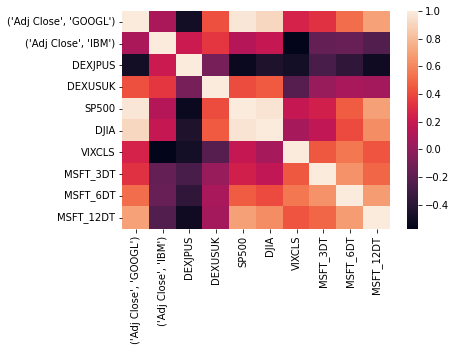

In [36]:
sns.heatmap(cor_data)

*   Reduce Corr() to Lower Matrix

In [37]:
lower = pd.DataFrame(np.tril(cor_data, -1), columns=cor_data.columns)

In [38]:
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.093681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.494767,0.210694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.428291,0.340352,-0.096043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.976016,0.127624,-0.536218,0.415541,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.916880,0.190661,-0.445530,0.458584,0.966801,0.000000,0.000000,0.000000,0.000000,0.0
6,0.260507,-0.573092,-0.487589,-0.221913,0.194615,0.073058,0.000000,0.000000,0.000000,0.0
7,0.319392,-0.166611,-0.271339,0.024742,0.240561,0.174276,0.452226,0.000000,0.000000,0.0
8,0.519882,-0.151401,-0.372450,0.078487,0.463561,0.405242,0.552726,0.648137,0.000000,0.0
9,0.704874,-0.240512,-0.511481,0.062059,0.697977,0.625247,0.436171,0.494478,0.684979,0.0


*   Drop columns if |correlation value| > 0.9

In [39]:
to_drop = []
for column in lower.columns:
  for i in lower[column]:
    if abs(i) > 0.9 :
     to_drop.append(column)

In [40]:
to_drop

[('Adj Close', 'GOOGL'), ('Adj Close', 'GOOGL'), 'SP500']

In [41]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.065250,1.942070,0.839018,-1.296609,-1.185554,-1.464163,-0.762129,-0.321765,-0.933498,-0.879292
1,-1.073029,1.974309,0.856758,-1.384129,-1.194438,-1.469902,-0.667495,-0.319762,-0.868237,-0.866546
2,-1.053631,2.137803,1.424427,-1.591515,-1.147445,-1.400836,-0.710822,-0.401845,-0.893142,-0.900953
3,-1.064954,2.028807,1.704714,-1.688548,-1.167859,-1.426471,-0.794054,-0.327103,-0.839569,-0.889897
4,-1.066218,1.991963,1.757933,-1.722795,-1.166114,-1.425847,-0.890968,-0.347124,-0.786756,-0.890573
...,...,...,...,...,...,...,...,...,...,...
1059,1.430725,1.789162,-0.019582,1.945447,1.487462,1.669759,-0.147578,2.340761,1.717263,0.633873
1060,1.392963,1.773275,0.225225,1.797043,1.465259,1.664444,-0.083729,2.449508,1.776067,0.317911
1061,1.468437,1.948027,-0.079897,1.941642,1.519116,1.705283,-0.268436,2.008118,1.385617,-0.027117
1062,1.482764,2.004098,-0.140212,1.949252,1.514216,1.676558,-0.268436,1.659132,1.410904,-0.168304


In [42]:
X.drop(to_drop, inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,1.942070,0.839018,-1.296609,-1.464163,-0.762129,-0.321765,-0.933498,-0.879292
1,1.974309,0.856758,-1.384129,-1.469902,-0.667495,-0.319762,-0.868237,-0.866546
2,2.137803,1.424427,-1.591515,-1.400836,-0.710822,-0.401845,-0.893142,-0.900953
3,2.028807,1.704714,-1.688548,-1.426471,-0.794054,-0.327103,-0.839569,-0.889897
4,1.991963,1.757933,-1.722795,-1.425847,-0.890968,-0.347124,-0.786756,-0.890573
...,...,...,...,...,...,...,...,...
1059,1.789162,-0.019582,1.945447,1.669759,-0.147578,2.340761,1.717263,0.633873
1060,1.773275,0.225225,1.797043,1.664444,-0.083729,2.449508,1.776067,0.317911
1061,1.948027,-0.079897,1.941642,1.705283,-0.268436,2.008118,1.385617,-0.027117
1062,2.004098,-0.140212,1.949252,1.676558,-0.268436,1.659132,1.410904,-0.168304


* Train / Test Preparation

In [44]:
test_size = int(0.3 * len(X))
train_size = int(0.7 * len(X))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [45]:
# print(len(X))
# print(test_size)
# print(train_size)
# print(test_size+train_size)

# 5.2 (a) Model Training and Cross Validation
* Set number of fold / Seed value

In [46]:
num_fold = 7
seed = 4

* Cross Validation Model

In [47]:
# set k-fold crossvalidation with shuffle
kfold = model_selection.KFold(n_splits=num_fold, shuffle = True, random_state=seed)

* Model selection

In [48]:
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#c_val ลองอย่างน้อย 3 ค่า [0.1, 1, 10, 100]
c_val = 1e5
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

# **6.2 Create Model List and Parameter Dictionary**

In [50]:
# Create Model List
regression = {'LR': LinearRegression(), 'SVR': SVR()}

* Create Parameter Dictionary for Linear Regression



In [51]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

* Create Parameter Dictionary for SVR

In [52]:
kernel = ['linear', 'rbf', 'poly']
C_list = [10, 100]
ep_list = [0.1, 1, 5]
gamma = [0.01, 0.1]
degree = [2, 3]

params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

* GridSearchCV() -> (a)

In [53]:
k = 3

for EST in regression:
  model = regression[EST]
  if (EST == 'LR'):
    params = params_LR
  else:
    params = params_SVR

  grid = GridSearchCV( estimator=model, n_jobs = 1,

          verbose = 10,
          cv = k,
          scoring = 'neg_mean_squared_error',
          param_grid = params )

  grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/3; 1/4] END fit_intercept=True, normalize=True;, score=-500.720 total time=   0.0s
[CV 2/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/3; 1/4] END fit_intercept=True, normalize=True;, score=-134.145 total time=   0.0s
[CV 3/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/3; 1/4] END fit_intercept=True, normalize=True;, score=-791.388 total time=   0.0s
[CV 1/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/3; 2/4] END fit_intercept=True, normalize=False;, score=-500.720 total time=   0.0s
[CV 2/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/3; 2/4] END fit_intercept=True, normalize=False;, score=-134.145 total time=   0.0s
[CV 3/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 3/3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only

[CV 2/3; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-77.294 total time=   0.0s
[CV 3/3; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 3/3; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-1905.005 total time=   0.0s
[CV 1/3; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/3; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-1548.409 total time=   0.0s
[CV 2/3; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 2/3; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-51.715 total time=   0.0s
[CV 3/3; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 3/3; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-2821.589 total time=   0.0s
[CV 1/3; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 1/3; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-46.684 total time=   0.0s
[CV 3/3; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 3/3; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-1542.836 total time=   0.0s
[CV 1/3; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 1/3; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-853.600 total time=   0.0s
[CV 2/3; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 2/3; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-184.356 total time=   0.0s
[CV 3/3; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 3/3; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1975.245 total time=   0.0s
[CV 1/3; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 1/3; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, ker

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-1944.766 total time=   0.0s
[CV 1/3; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 1/3; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-1553.145 total time=   0.0s
[CV 2/3; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 2/3; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-51.715 total time=   0.0s
[CV 3/3; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 3/3; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-2840.878 total time=   0.0s
[CV 1/3; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/3; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-220.874 total time=   0.0s
[CV 2/3; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/3; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kern

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 1/3; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-861.129 total time=   0.0s
[CV 2/3; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/3; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-173.046 total time=   0.0s
[CV 3/3; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 3/3; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-1950.845 total time=   0.0s
[CV 1/3; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/3; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-172.680 total time=   0.0s
[CV 2/3; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/3; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-127.331 total time=   0.0s
[CV 3/3; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 3/3; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-762.450 total time=   0.0s
[CV 1/3; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/3; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-785.667 total time=   0.0s
[CV 2/3; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/3; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-46.024 total time=   0.0s
[CV 3/3; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 3/3; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-1723.539 total time=   0.0s
[CV 1/3; 18/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly.........
[CV 1/3; 18/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-976.875 total time=   0.0s
[CV 2/3; 18/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=poly.........
[CV 2/3; 18/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-1905.005 total time=   0.0s
[CV 1/3; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 1/3; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-1529.797 total time=   0.0s
[CV 2/3; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 2/3; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-45.460 total time=   0.0s
[CV 3/3; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 3/3; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-2739.769 total time=   0.0s
[CV 1/3; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 1/3; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-230.686 total time=   0.0s
[CV 2/3; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 2/3; 22/72] END C=10, degree=3, epsilon=0.1,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-1542.836 total time=   0.0s
[CV 1/3; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 1/3; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1389.070 total time=   0.0s
[CV 2/3; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 2/3; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-79.289 total time=   0.0s
[CV 3/3; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 3/3; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-2349.499 total time=   0.0s
[CV 1/3; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 1/3; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-220.874 total time=   0.0s
[CV 2/3; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 2/3; 25/72] END C=10, degree=3, epsilon=1, gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 1/3; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-1529.554 total time=   0.0s
[CV 2/3; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 2/3; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-45.460 total time=   0.0s
[CV 3/3; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 3/3; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-2757.128 total time=   0.0s
[CV 1/3; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/3; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-220.874 total time=   0.0s
[CV 2/3; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/3; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-115.880 total time=   0.0s
[CV 3/3; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 3/3; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-2382.043 total time=   0.0s
[CV 1/3; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/3; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-172.680 total time=   0.0s
[CV 2/3; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/3; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-127.331 total time=   0.0s
[CV 3/3; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 3/3; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-762.450 total time=   0.0s
[CV 1/3; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/3; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-1154.195 total time=   0.0s
[CV 2/3; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/3; 32/72] END C=10, degree=3, epsilon=5, gamma=0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-1723.539 total time=   0.0s
[CV 1/3; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 1/3; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-1564.222 total time=   0.0s
[CV 2/3; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 2/3; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-84.430 total time=   0.0s
[CV 3/3; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 3/3; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-2343.352 total time=   0.0s
[CV 1/3; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 1/3; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-340.753 total time=   0.1s
[CV 2/3; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-117.993 total time=   0.1s
[CV 3/3; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 3/3; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-859.060 total time=   0.1s
[CV 1/3; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/3; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-84.329 total time=   0.0s
[CV 2/3; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/3; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-82.294 total time=   0.0s
[CV 3/3; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-942.260 total time=   0.0s
[CV 1/3; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/3; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-1609.719 total time=   0.0s
[CV 2/3; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/3; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-144.450 total time=   0.0s
[CV 3/3; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 3/3; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-2625.403 total time=   0.0s
[CV 1/3; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/3; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-340.753 total time=   0.1s
[CV 2/3; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-117.993 total time=   0.1s
[CV 3/3; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 3/3; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-859.060 total time=   0.1s
[CV 1/3; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/3; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-399.668 total time=   0.0s
[CV 2/3; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/3; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-40.936 total time=   0.0s
[CV 3/3; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-1298.429 total time=   0.0s
[CV 1/3; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/3; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-339.437 total time=   0.0s
[CV 2/3; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/3; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-320.359 total time=   0.0s
[CV 3/3; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 3/3; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1693.548 total time=   0.0s
[CV 1/3; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/3; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-322.906 total time=   0.1s
[CV 2/3; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-115.684 total time=   0.1s
[CV 3/3; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 3/3; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-868.092 total time=   0.1s
[CV 1/3; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/3; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-78.018 total time=   0.0s
[CV 2/3; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/3; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-90.755 total time=   0.0s
[CV 3/3; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 3/3; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-961.675 total time=   0.0s
[CV 1/3; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 1/3; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-1597.060 total time=   0.0s
[CV 2/3; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/3; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-145.243 total time=   0.0s
[CV 3/3; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 3/3; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-2598.619 total time=   0.0s
[CV 1/3; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/3; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-322.906 total time=   0.1s
[CV 2/3; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 2/3; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-115.684 total time=   0.1s
[CV 3/3; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-868.092 total time=   0.1s
[CV 1/3; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/3; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-360.409 total time=   0.0s
[CV 2/3; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/3; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-43.697 total time=   0.0s
[CV 3/3; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 3/3; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-1251.645 total time=   0.0s
[CV 1/3; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/3; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-340.687 total time=   0.0s
[CV 2/3; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/3; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, ke

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-133.761 total time=   0.0s
[CV 3/3; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 3/3; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-712.099 total time=   0.0s
[CV 1/3; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/3; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-144.154 total time=   0.0s
[CV 2/3; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/3; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-65.359 total time=   0.0s
[CV 3/3; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/3; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-1002.689 total time=   0.0s
[CV 1/3; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/3; 51/72] END C=100, degree=2, epsilon=5, gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 1/3; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-392.768 total time=   0.0s
[CV 2/3; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/3; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-51.589 total time=   0.0s
[CV 3/3; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 3/3; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-1501.903 total time=   0.0s
[CV 1/3; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/3; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-296.770 total time=   0.0s
[CV 2/3; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/3; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-225.737 total time=   0.0s
[CV 3/3; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 3/3; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kern

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-117.993 total time=   0.1s
[CV 3/3; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 3/3; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-859.060 total time=   0.1s
[CV 1/3; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/3; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-84.329 total time=   0.0s
[CV 2/3; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/3; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-82.294 total time=   0.0s
[CV 3/3; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-942.260 total time=   0.0s
[CV 1/3; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/3; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-1570.626 total time=   0.0s
[CV 2/3; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/3; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-47.202 total time=   0.0s
[CV 3/3; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 3/3; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-2770.019 total time=   0.0s
[CV 1/3; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/3; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-340.753 total time=   0.1s
[CV 2/3; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-117.993 total time=   0.1s
[CV 3/3; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 3/3; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-859.060 total time=   0.1s
[CV 1/3; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/3; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-399.668 total time=   0.0s
[CV 2/3; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/3; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-40.936 total time=   0.0s
[CV 3/3; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-1298.429 total time=   0.0s
[CV 1/3; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/3; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-550.442 total time=   0.0s
[CV 2/3; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/3; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-286.442 total time=   0.0s
[CV 3/3; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 3/3; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1964.408 total time=   0.0s
[CV 1/3; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/3; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-322.906 total time=   0.1s
[CV 2/3; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-115.684 total time=   0.1s
[CV 3/3; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 3/3; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-868.092 total time=   0.1s
[CV 1/3; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/3; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-78.018 total time=   0.0s
[CV 2/3; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/3; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-90.755 total time=   0.0s
[CV 3/3; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 3/3; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-961.675 total time=   0.0s
[CV 1/3; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/3; 63/72] END C=100, degree=3, epsilon=1, gamma=0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-47.202 total time=   0.0s
[CV 3/3; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 3/3; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-2804.991 total time=   0.0s
[CV 1/3; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/3; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-322.906 total time=   0.1s
[CV 2/3; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 2/3; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-115.684 total time=   0.1s
[CV 3/3; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-868.092 total time=   0.1s
[CV 1/3; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/3; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-360.409 total time=   0.0s
[CV 2/3; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/3; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-43.697 total time=   0.0s
[CV 3/3; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 3/3; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-1251.645 total time=   0.0s
[CV 1/3; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/3; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-590.815 total time=   0.0s
[CV 2/3; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/3; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, ke

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/3; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-133.761 total time=   0.0s
[CV 3/3; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 3/3; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-712.099 total time=   0.0s
[CV 1/3; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/3; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-144.154 total time=   0.0s
[CV 2/3; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/3; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-65.359 total time=   0.0s
[CV 3/3; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/3; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-1002.689 total time=   0.0s
[CV 1/3; 69/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/3; 69/72] END C=100, degree=3, epsilon=5, gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/3; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-712.099 total time=   0.0s
[CV 1/3; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/3; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-392.768 total time=   0.0s
[CV 2/3; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/3; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-51.589 total time=   0.0s
[CV 3/3; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 3/3; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-1501.903 total time=   0.0s
[CV 1/3; 72/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/3; 72/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-902.657 total time=   0.0s
[CV 2/3; 72/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/3; 72/72] END C=100, degree=3, epsilon=5, gamma=0.1, ke

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* GridSearchCV() -> (b)

In [54]:
# Show Best Parameters for both models
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 10, 'degree': 2, 'epsilon': 5, 'gamma': 0.01, 'kernel': 'linear'}
Best score:  -354.1535698981784


In [142]:

# Show Score for each parameter combination for both model
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

linear_ker = []
rbf_ker = []
poly_ker = []

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
  # if 'linear' in param:
  #   linear_ker.append(mean,stdev,param)
  # elif 'rbf' in param:
  #   rbf_ker.append(mean,stdev,param)
  # elif 'poly' in param :
  #   poly_ker.append(mean,stdev,param)

-410.876584 (341.711252) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-985.063199 (746.209895) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-1473.904327 (1132.022921) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-410.876584 (341.711252) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-743.566762 (615.077388) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-1004.400341 (738.862556) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-403.189467 (334.830159) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-997.400790 (764.744012) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-1481.912619 (1139.784512) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-403.189467 (334.830159) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma

In [200]:
lin_index = []
rbf_index = []
poly_index = []
comb = []
for i in range(len(params)):
  if params[i]['kernel'] == 'poly':
    print('found poly')
    poly_index.append(i)
  elif params[i]['kernel'] == 'linear':
    print('found linear')
    lin_index.append(i)
  elif params[i]['kernel'] == 'rbf':
    print('found rbf')
    rbf_index.append(i)

found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly
found linear
found rbf
found poly


In [201]:
print(lin_index)
print(rbf_index)
print(poly_index)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70]
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71]


In [202]:
lin_mean = []
lin_std = []
for i in lin_index:
  lin_mean.append(means[i])
  lin_std.append(stds[i])

rbf_std = []
rbf_mean = []
for i in rbf_index:
  rbf_mean.append(means[i])
  rbf_std.append(stds[i])

poly_std = []
poly_mean = []
for i in poly_index:
  poly_mean.append(means[i])
  poly_std.append(stds[i])

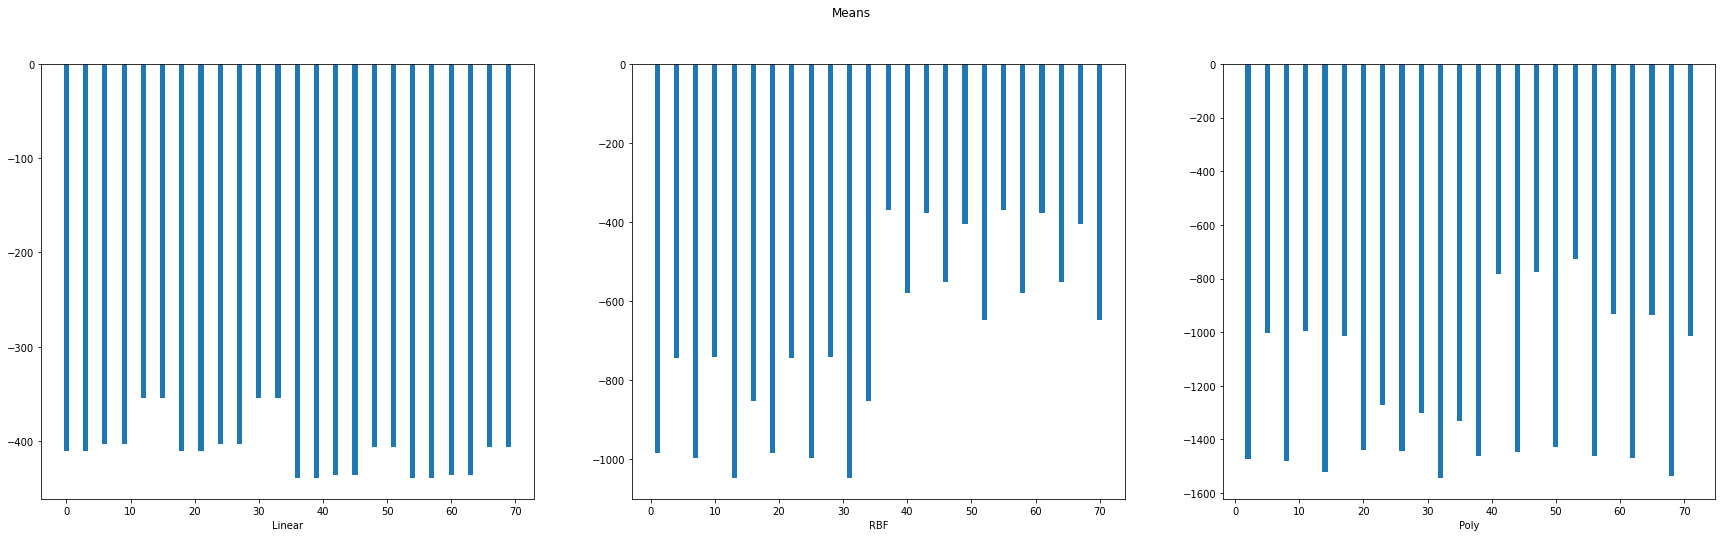

In [204]:
#ax1 = df_mean_rand.plot.bar(rot=0, figsize=(30,13),xlabel='Combination', ylabel='Value',legend=False, title='Mean')

fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3)
fig.set_size_inches((30,8))
fig.suptitle('Means')

ax1.bar(lin_index,lin_mean)



ax2.bar(rbf_index,rbf_mean)

ax3.bar(poly_index,poly_mean)

#ax.set_ylabel('Explained Variance ratio')
ax1.set_xlabel('Linear')
ax2.set_xlabel('RBF')
ax3.set_xlabel('Poly')
plt.show()

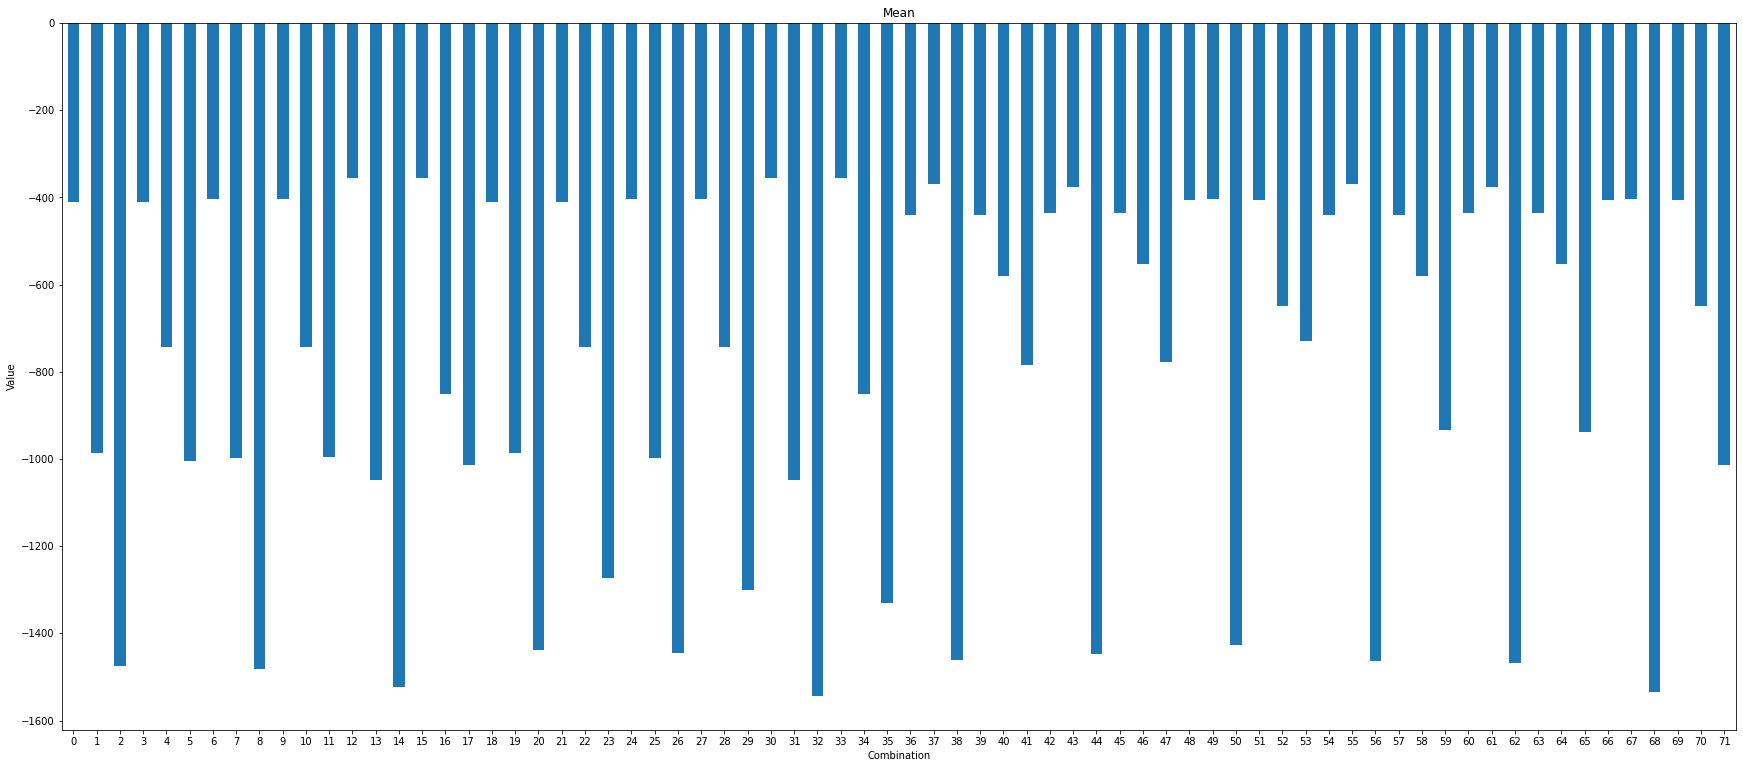

In [208]:
df_mean = pd.DataFrame(means)
ax1 = df_mean.plot.bar(rot=0, figsize=(30,13),xlabel='Combination', ylabel='Value',legend=False, title='Mean')

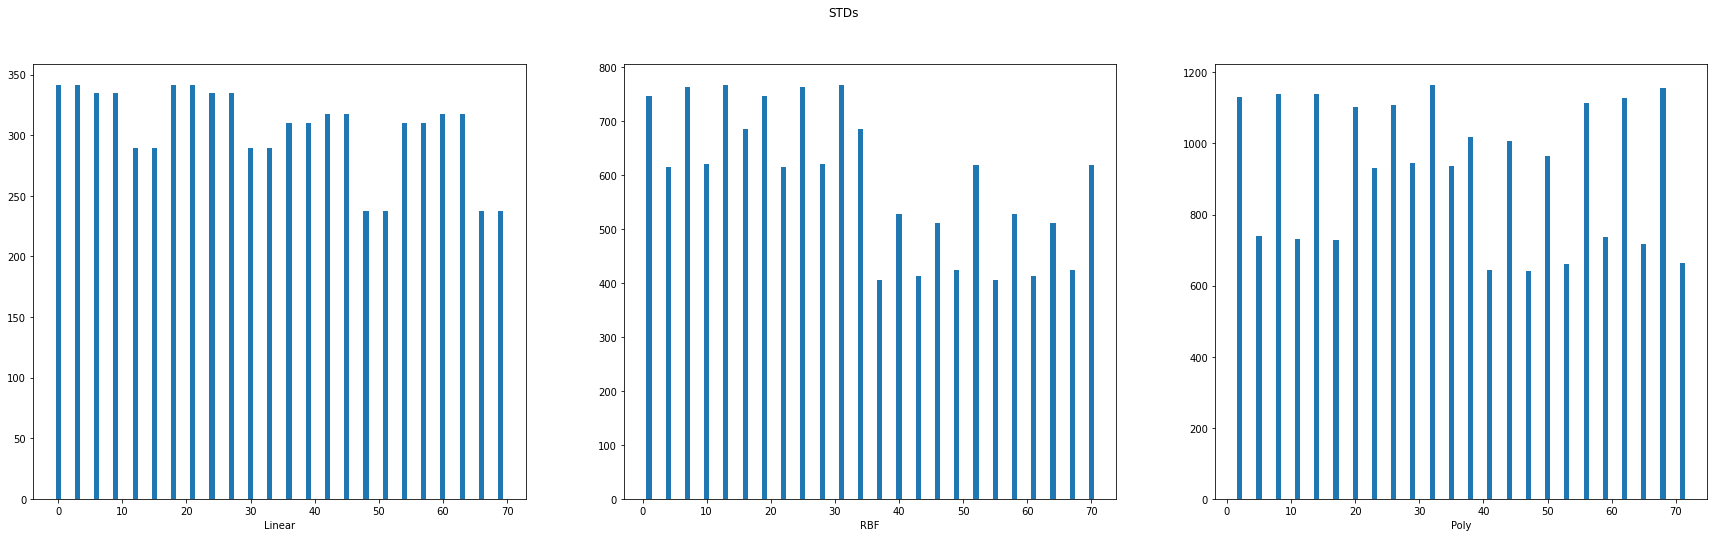

In [210]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3)
fig.set_size_inches((30,8))
fig.suptitle('STDs')

ax1.bar(lin_index,lin_std)



ax2.bar(rbf_index,rbf_std)

ax3.bar(poly_index,poly_std)

#ax.set_ylabel('Explained Variance ratio')
ax1.set_xlabel('Linear')
ax2.set_xlabel('RBF')
ax3.set_xlabel('Poly')
plt.show()

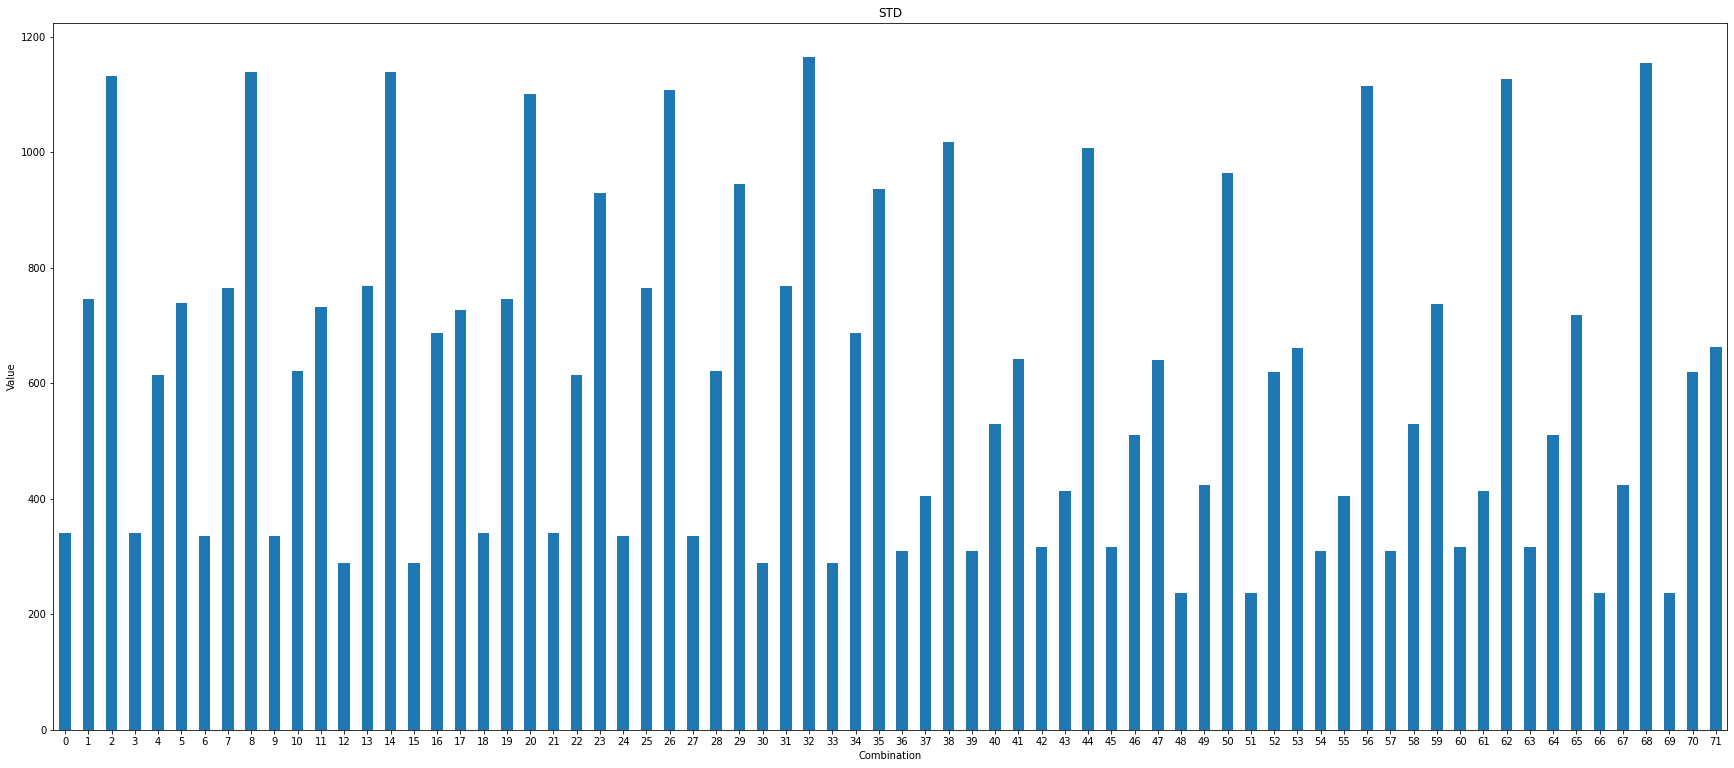

In [209]:
df_std = pd.DataFrame(stds)
ax1 = df_std.plot.bar(rot=0, figsize=(30,13),xlabel='Combination', ylabel='Value',legend=False, title='STD')

In [97]:
df_params = pd.DataFrame(params)

# fig, (ax1) = plt.subplots(1, 1)
# fig.set_size_inches((20,15))
# fig.suptitle('std')
# #ax1.bar(comb,params[comb]['C'])
# ax1.set_xlabel('combination')
# ax1.set_ylabel('value')
# plt.show()

In [98]:
df_params

,C,degree,epsilon,gamma,kernel
0,10,2,0.1,0.01,linear
1,10,2,0.1,0.01,rbf
2,10,2,0.1,0.01,poly
3,10,2,0.1,0.10,linear
4,10,2,0.1,0.10,rbf
...,...,...,...,...,...
67,100,3,5.0,0.01,rbf
68,100,3,5.0,0.01,poly
69,100,3,5.0,0.10,linear
70,100,3,5.0,0.10,rbf


In [159]:
df_kernel = df_params.groupby('kernel')    
[df_kernel.get_group(x) for x in df_kernel.groups]

[      C  degree  epsilon  gamma  kernel
 0    10       2      0.1   0.01  linear
 3    10       2      0.1   0.10  linear
 6    10       2      1.0   0.01  linear
 9    10       2      1.0   0.10  linear
 12   10       2      5.0   0.01  linear
 15   10       2      5.0   0.10  linear
 18   10       3      0.1   0.01  linear
 21   10       3      0.1   0.10  linear
 24   10       3      1.0   0.01  linear
 27   10       3      1.0   0.10  linear
 30   10       3      5.0   0.01  linear
 33   10       3      5.0   0.10  linear
 36  100       2      0.1   0.01  linear
 39  100       2      0.1   0.10  linear
 42  100       2      1.0   0.01  linear
 45  100       2      1.0   0.10  linear
 48  100       2      5.0   0.01  linear
 51  100       2      5.0   0.10  linear
 54  100       3      0.1   0.01  linear
 57  100       3      0.1   0.10  linear
 60  100       3      1.0   0.01  linear
 63  100       3      1.0   0.10  linear
 66  100       3      5.0   0.01  linear
 69  100       3

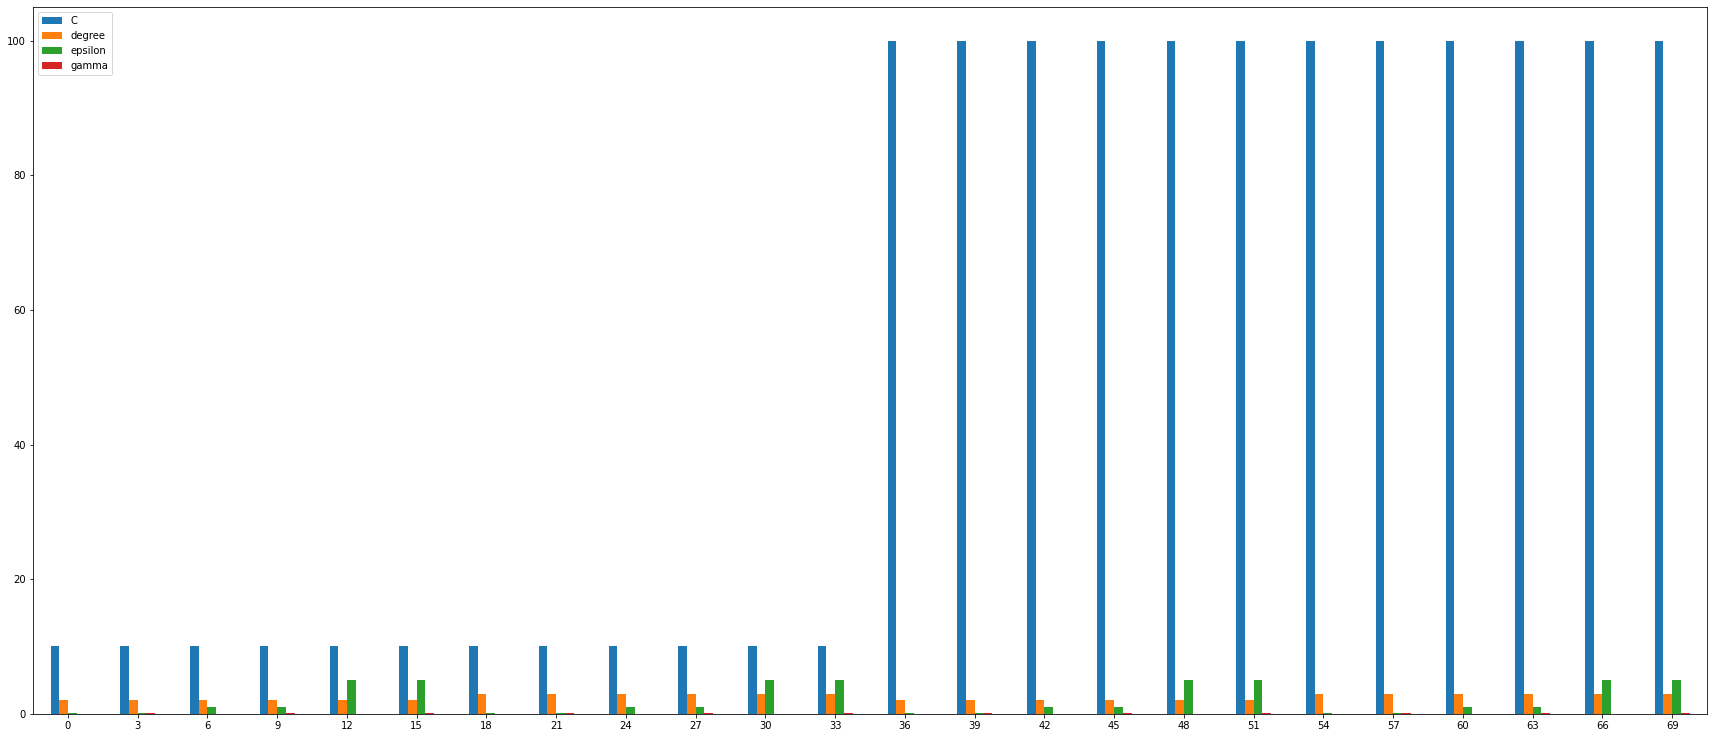

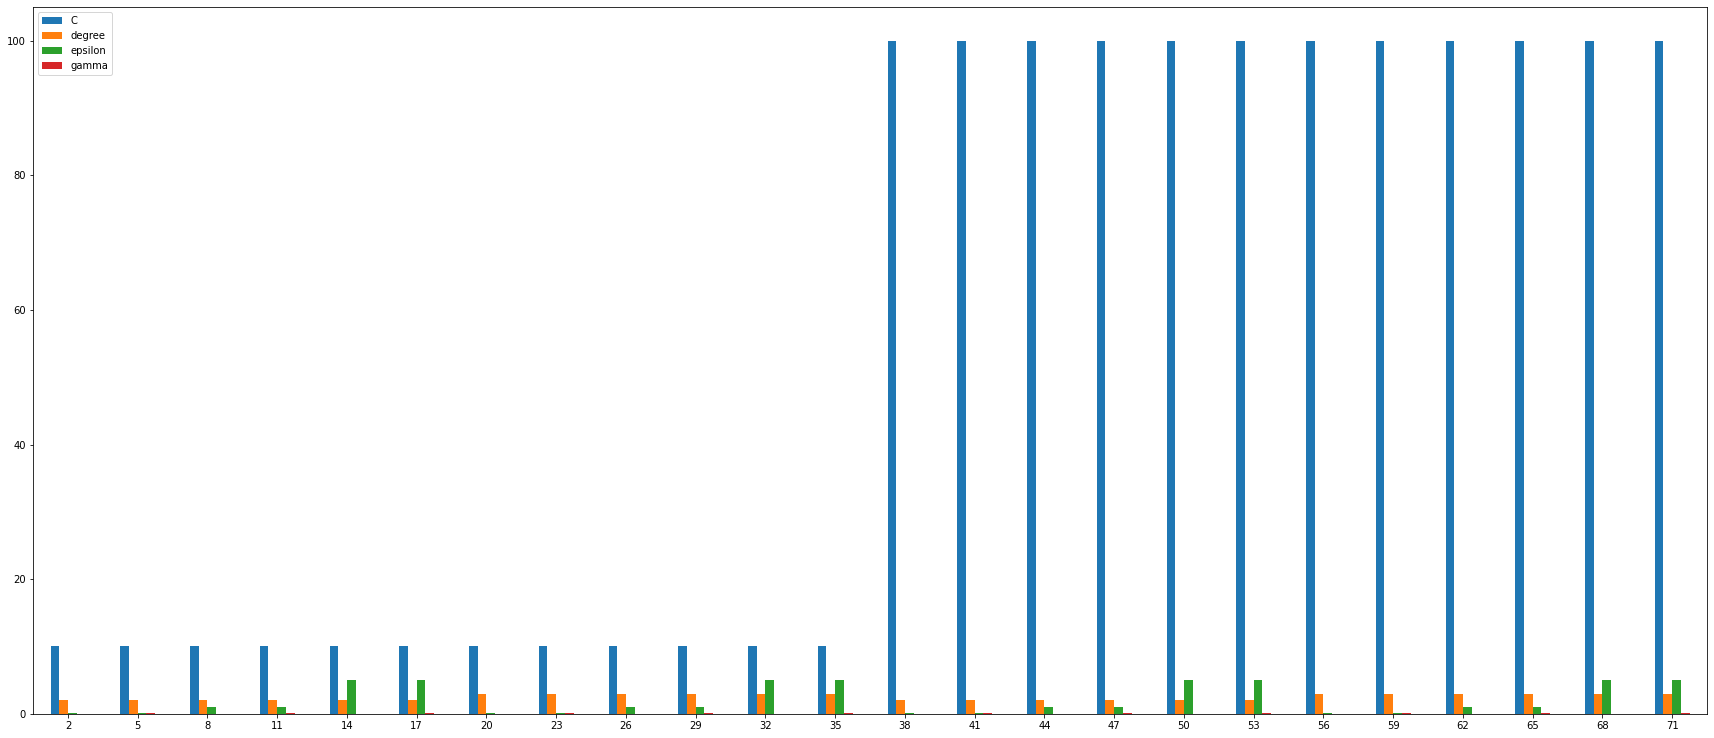

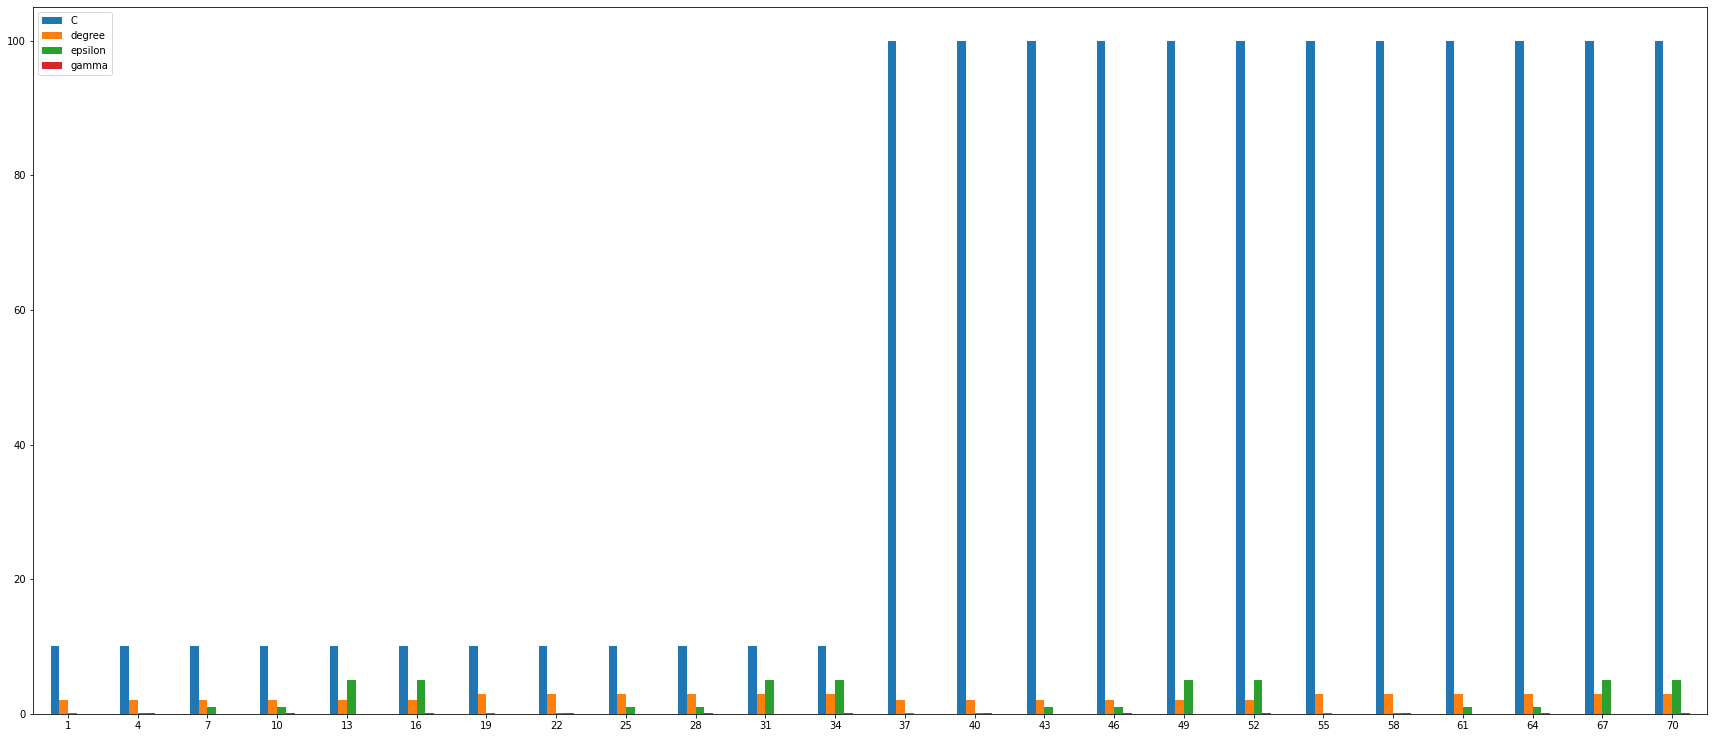

In [158]:
ax =df_kernel.plot.bar(rot=0, figsize=(30,13) ) 

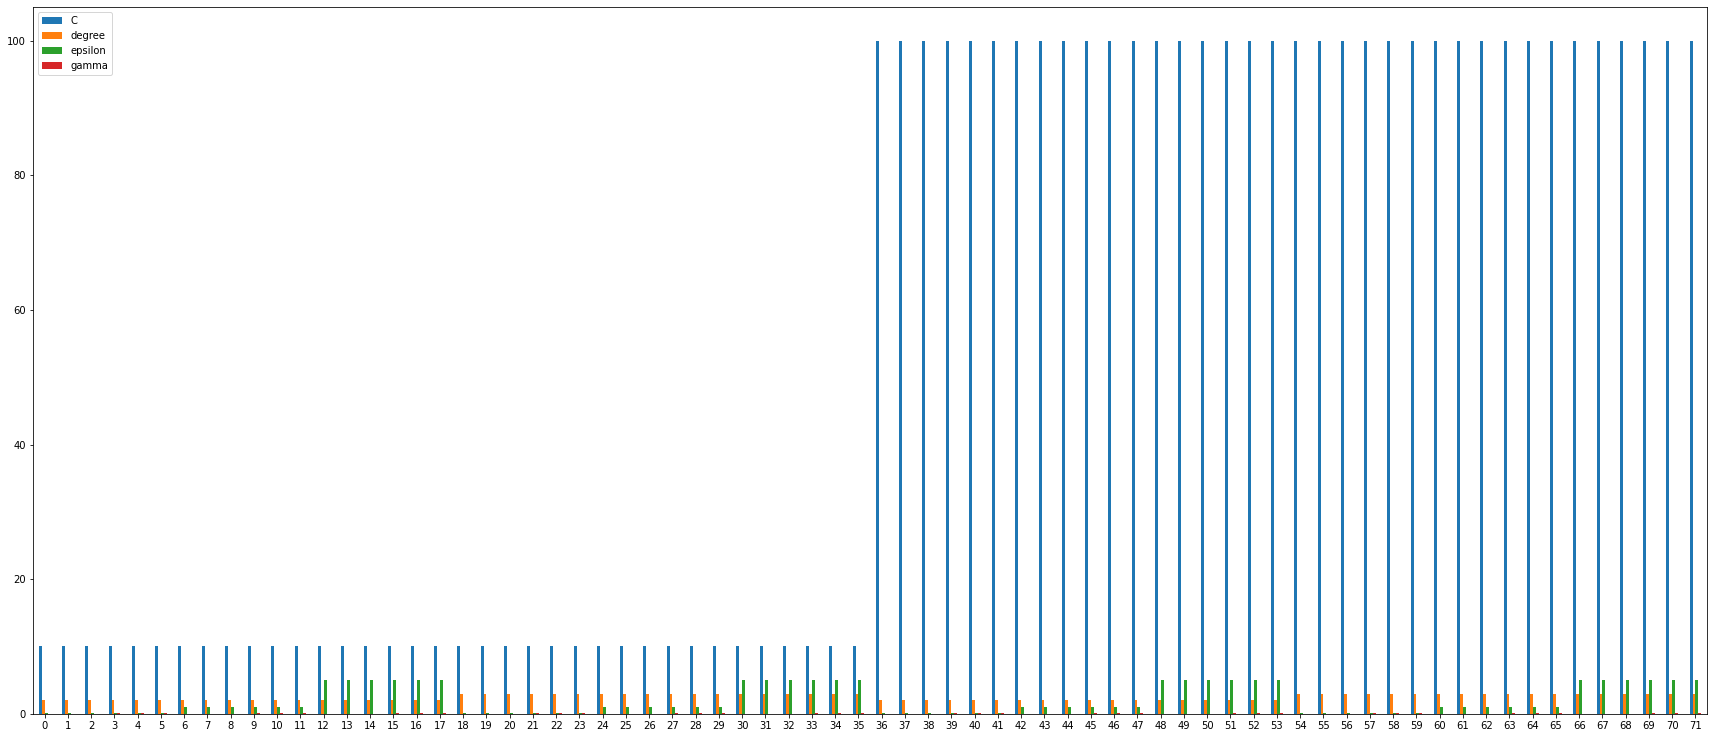

In [105]:
ax = df_params.plot.bar(rot=0, figsize=(30,13)) 


# **6.2 Create Model List and Parameter Dictionary**

In [110]:
# Create Model List
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [111]:
# Create Parameter Dictionary for Linear Regression
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [112]:
# Create Parameter Dictionary for SVR
kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.1, 150, 5, dtype = float))
ep_list = list(np.linspace(0.1, 1, 5, dtype = float))
gamma = list(np.linspace(0.01, 0.1, 5, dtype = float))
degree = [2, 3]

params_SVR = dict(kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree)

* RandomizedSearchCV() -> (a)

In [114]:
k = 5

for EST in regression:
  model = regression[EST]
  if (EST == 'LR'):
    params = params_LR
  else:
    params = params_SVR

  grid_rand = RandomizedSearchCV( estimator=model, 
                                  n_jobs = 1,
                                  random_state = 25,
                                  verbose = 10,
                                  cv = k,
                                  scoring = 'neg_mean_squared_error',
                                  n_iter = 10,
                                  param_distributions = params )

  grid_rand_result = grid_rand.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support n

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/5; 1/4] END fit_intercept=True, normalize=True;, score=-256.803 total time=   0.0s
[CV 2/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/5; 1/4] END fit_intercept=True, normalize=True;, score=-332.020 total time=   0.0s
[CV 3/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/5; 1/4] END fit_intercept=True, normalize=True;, score=-95.611 total time=   0.0s
[CV 4/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/5; 1/4] END fit_intercept=True, normalize=True;, score=-23.329 total time=   0.0s
[CV 5/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 5/5; 1/4] END fit_intercept=True, normalize=True;, score=-297.635 total time=   0.0s
[CV 1/5; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/5; 2/

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was

[CV 1/5; 2/10] END C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf;, score=-28.561 total time=   0.1s
[CV 2/5; 2/10] START C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf...
[CV 2/5; 2/10] END C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf;, score=-405.724 total time=   0.1s
[CV 3/5; 2/10] START C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf...
[CV 3/5; 2/10] END C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf;, score=-56.188 total time=   0.1s
[CV 4/5; 2/10] START C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf...
[CV 4/5; 2/10] END C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf;, score=-39.572 total time=   0.1s
[CV 5/5; 2/10] START C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 5/5; 2/10] END C=75.05, degree=3, epsilon=0.1, gamma=0.0325, kernel=rbf;, score=-261.888 total time=   0.1s
[CV 1/5; 3/10] START C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 1/5; 3/10] END C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-1202.269 total time=   0.0s
[CV 2/5; 3/10] START C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 2/5; 3/10] END C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-282.164 total time=   0.0s
[CV 3/5; 3/10] START C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 3/5; 3/10] END C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-179.427 total time=   0.0s
[CV 4/5; 3/10] START C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear
[CV 4/5; 3/10] END C=0.1, degree=2, epsilon=0.775, gamma=0.05500000000000001, kernel=linear;, score=-149.592 total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 2/5; 4/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-219.165 total time=   0.1s
[CV 3/5; 4/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear
[CV 3/5; 4/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-78.443 total time=   0.1s
[CV 4/5; 4/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 4/5; 4/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-28.393 total time=   0.2s
[CV 5/5; 4/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear
[CV 5/5; 4/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-285.936 total time=   0.1s
[CV 1/5; 5/10] START C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear....
[CV 1/5; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear;, score=-1198.611 total time=   0.0s
[CV 2/5; 5/10] START C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear....
[CV 2/5; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear;, score=-286.997 total time=   0.0s
[CV 3/5; 5/10] START C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear....


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/5; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear;, score=-177.583 total time=   0.0s
[CV 4/5; 5/10] START C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear....
[CV 4/5; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear;, score=-151.129 total time=   0.0s
[CV 5/5; 5/10] START C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear....
[CV 5/5; 5/10] END C=0.1, degree=3, epsilon=1.0, gamma=0.01, kernel=linear;, score=-1723.223 total time=   0.0s
[CV 1/5; 6/10] START C=0.1, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear
[CV 1/5; 6/10] END C=0.1, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-1203.228 total time=   0.0s
[CV 2/5; 6/10] START C=0.1, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear
[CV 2/5; 6/10] END C=0.1, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-277.347 total time=   0.0s
[CV 3/5; 6/10] START C=0.1, degree=2, epsilon=0.1, gamma=0.05500000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 5/5; 6/10] END C=0.1, degree=2, epsilon=0.1, gamma=0.05500000000000001, kernel=linear;, score=-1778.641 total time=   0.0s
[CV 1/5; 7/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf.
[CV 1/5; 7/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-81.608 total time=   0.1s
[CV 2/5; 7/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf.
[CV 2/5; 7/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-399.015 total time=   0.1s
[CV 3/5; 7/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf.
[CV 3/5; 7/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-45.677 total time=   0.1s
[CV 4/5; 7/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 4/5; 7/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-46.335 total time=   0.1s
[CV 5/5; 7/10] START C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf.
[CV 5/5; 7/10] END C=37.575, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-389.359 total time=   0.0s
[CV 1/5; 8/10] START C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly...
[CV 1/5; 8/10] END C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly;, score=-137.680 total time=   0.0s
[CV 2/5; 8/10] START C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly...
[CV 2/5; 8/10] END C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly;, score=-1268.461 total time=   0.0s
[CV 3/5; 8/10] START C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly...
[CV 3/5; 8/10] END C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly;, score=-161.140 total time=   0.0s
[CV 4/5; 8/10] START C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 4/5; 8/10] END C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly;, score=-92.310 total time=   0.0s
[CV 5/5; 8/10] START C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly...
[CV 5/5; 8/10] END C=150.0, degree=2, epsilon=0.775, gamma=0.1, kernel=poly;, score=-1132.408 total time=   0.1s
[CV 1/5; 9/10] START C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 1/5; 9/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear;, score=-189.843 total time=   0.2s
[CV 2/5; 9/10] START C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear
[CV 2/5; 9/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear;, score=-203.803 total time=   0.2s
[CV 3/5; 9/10] START C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 3/5; 9/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear;, score=-79.161 total time=   0.1s
[CV 4/5; 9/10] START C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear
[CV 4/5; 9/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear;, score=-27.975 total time=   0.1s
[CV 5/5; 9/10] START C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/p

[CV 5/5; 9/10] END C=75.05, degree=3, epsilon=0.775, gamma=0.0325, kernel=linear;, score=-280.902 total time=   0.2s
[CV 1/5; 10/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly
[CV 1/5; 10/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly;, score=-716.802 total time=   0.0s
[CV 2/5; 10/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly
[CV 2/5; 10/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly;, score=-313.193 total time=   0.1s
[CV 3/5; 10/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly
[CV 3/5; 10/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly;, score=-61.097 total time=   0.0s
[CV 4/5; 10/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly
[CV 4/5; 10/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=poly;, score=-184.619 total t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* RandomizedCV() -> (b)

In [115]:
#Show Best Parameters for both models

print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.775, 'degree': 3, 'C': 75.05}
Best score:  -156.33671297905394


In [116]:
# Show Score for each parameter combination for both model

means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

-1195.225560 (1089.752681) with: {'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.775, 'degree': 3, 'C': 112.525}
-158.386640 (150.535604) with: {'kernel': 'rbf', 'gamma': 0.0325, 'epsilon': 0.1, 'degree': 3, 'C': 75.05}
-709.592904 (643.515537) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.775, 'degree': 2, 'C': 0.1}
-159.219192 (93.715529) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.55, 'degree': 2, 'C': 37.575}
-707.508649 (638.759200) with: {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 1.0, 'degree': 3, 'C': 0.1}
-718.445011 (657.822963) with: {'kernel': 'linear', 'gamma': 0.05500000000000001, 'epsilon': 0.1, 'degree': 2, 'C': 0.1}
-192.398778 (165.299860) with: {'kernel': 'rbf', 'gamma': 0.0775, 'epsilon': 0.55, 'degree': 2, 'C': 37.575}
-558.399655 (526.447036) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.775, 'degree': 2, 'C': 150.0}
-156.336713 (90.912136) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.775, 'degree': 3, 'C': 

In [117]:
# Display Mean, std, params
df_mean_rand = pd.DataFrame(means)
df_std_rand = pd.DataFrame(stds)
df_params_rand = pd.DataFrame(params)

In [120]:
df_params_rand

,kernel,gamma,epsilon,degree,C
0,poly,0.0100,0.775,3,112.525
1,rbf,0.0325,0.100,3,75.050
2,linear,0.0550,0.775,2,0.100
3,linear,0.0325,0.550,2,37.575
4,linear,0.0100,1.000,3,0.100
5,linear,0.0550,0.100,2,0.100
6,rbf,0.0775,0.550,2,37.575
7,poly,0.1000,0.775,2,150.000
8,linear,0.0325,0.775,3,75.050
9,poly,0.0550,0.100,3,112.525


In [162]:
df_kernel_rand = df_params_rand.groupby('kernel')    
[df_kernel_rand.get_group(x) for x in df_kernel_rand.groups]

[   kernel   gamma  epsilon  degree       C
 2  linear  0.0550    0.775       2   0.100
 3  linear  0.0325    0.550       2  37.575
 4  linear  0.0100    1.000       3   0.100
 5  linear  0.0550    0.100       2   0.100
 8  linear  0.0325    0.775       3  75.050,
   kernel  gamma  epsilon  degree        C
 0   poly  0.010    0.775       3  112.525
 7   poly  0.100    0.775       2  150.000
 9   poly  0.055    0.100       3  112.525,
   kernel   gamma  epsilon  degree       C
 1    rbf  0.0325     0.10       3  75.050
 6    rbf  0.0775     0.55       2  37.575]

In [169]:
ker_lin_index_rand = [2,3,4,5,8]
ker_poly_index_rand = [0,7,9]
ker_rbf_index_rand = [1,6]

In [186]:
lin_mean = []
lin_std = []
for i in ker_lin_index_rand:
  lin_mean.append(means[i])
  lin_std.append(stds[i])

rbf_std = []
rbf_mean = []
for i in ker_rbf_index_rand:
  rbf_mean.append(means[i])
  rbf_std.append(stds[i])

poly_std = []
poly_mean = []
for i in ker_poly_index_rand:
  poly_mean.append(means[i])
  poly_std.append(stds[i])

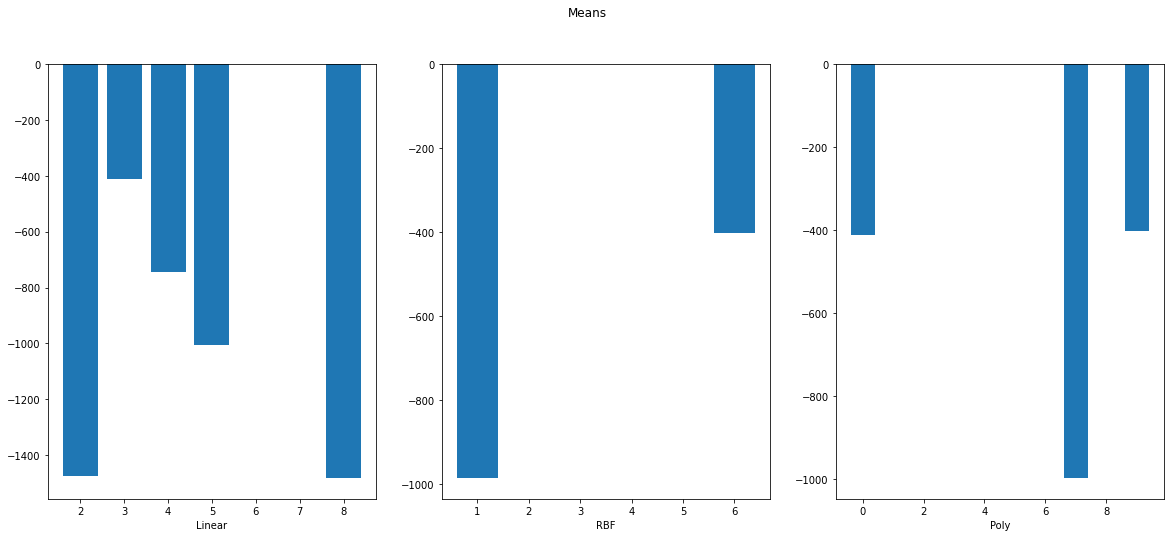

In [188]:
#ax1 = df_mean_rand.plot.bar(rot=0, figsize=(30,13),xlabel='Combination', ylabel='Value',legend=False, title='Mean')

fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3)
fig.set_size_inches((20,8))
fig.suptitle('Means')

ax1.bar(ker_lin_index_rand,lin_mean)



ax2.bar(ker_rbf_index_rand,rbf_mean)

ax3.bar(ker_poly_index_rand,poly_mean)

#ax.set_ylabel('Explained Variance ratio')
ax1.set_xlabel('Linear')
ax2.set_xlabel('RBF')
ax3.set_xlabel('Poly')
plt.show()

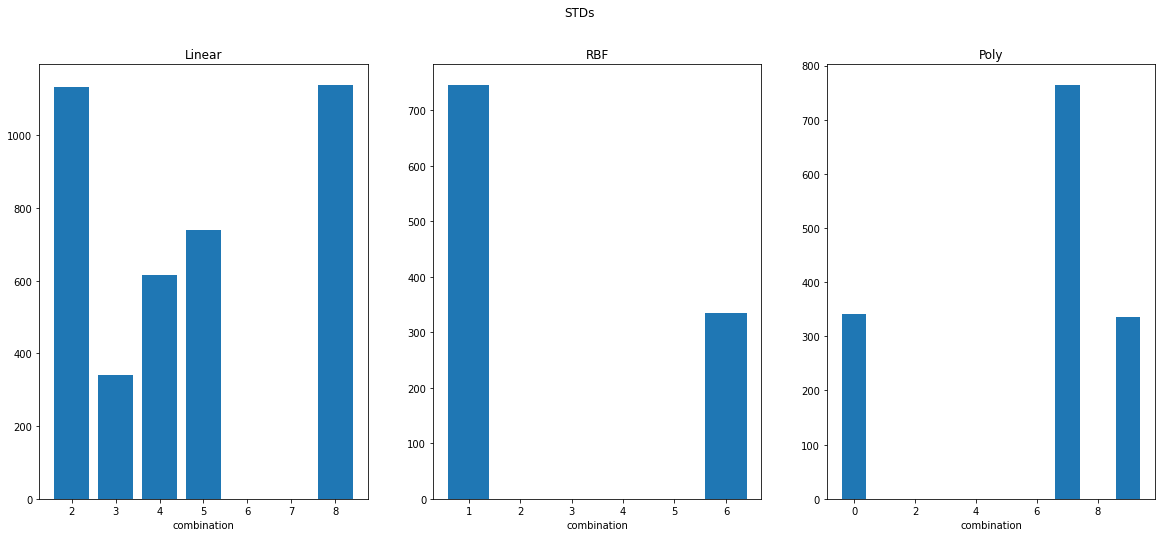

In [192]:
#ax2 = df_std_rand.plot.bar(rot=0, figsize=(30,13),xlabel='Combination', ylabel='Value',legend=False, title='STD')

fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3)
fig.set_size_inches((20,8))
fig.suptitle('STDs')

ax1.bar(ker_lin_index_rand,lin_std)



ax2.bar(ker_rbf_index_rand,rbf_std)

ax3.bar(ker_poly_index_rand,poly_std)

#ax.set_ylabel('Explained Variance ratio')
ax1.set_xlabel('combination')
ax1.set_title('Linear')

ax2.set_xlabel('combination')
ax2.set_title('RBF')

ax3.set_xlabel('combination')
ax3.set_title('Poly')
plt.show()

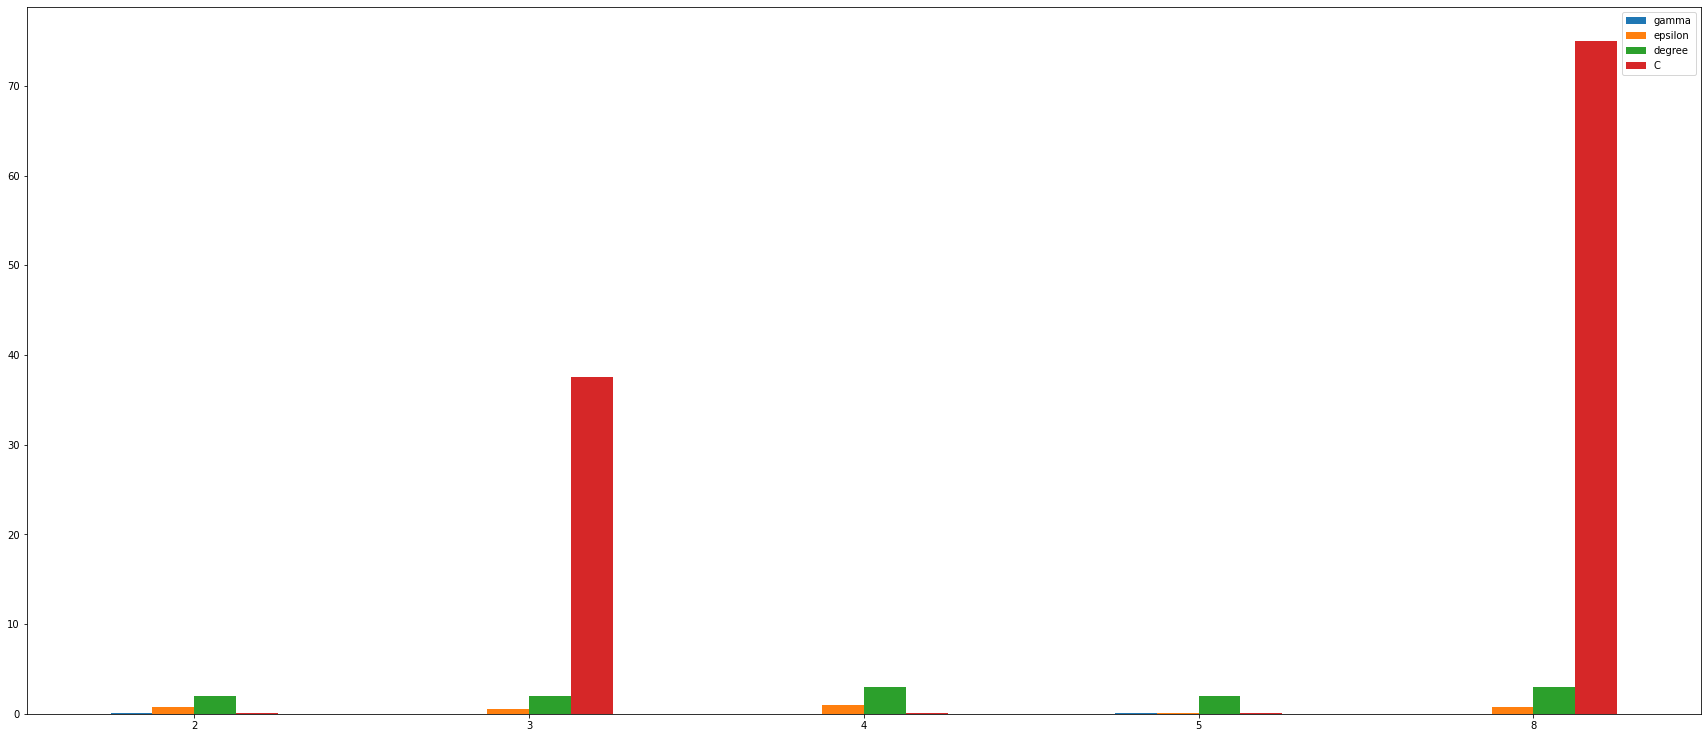

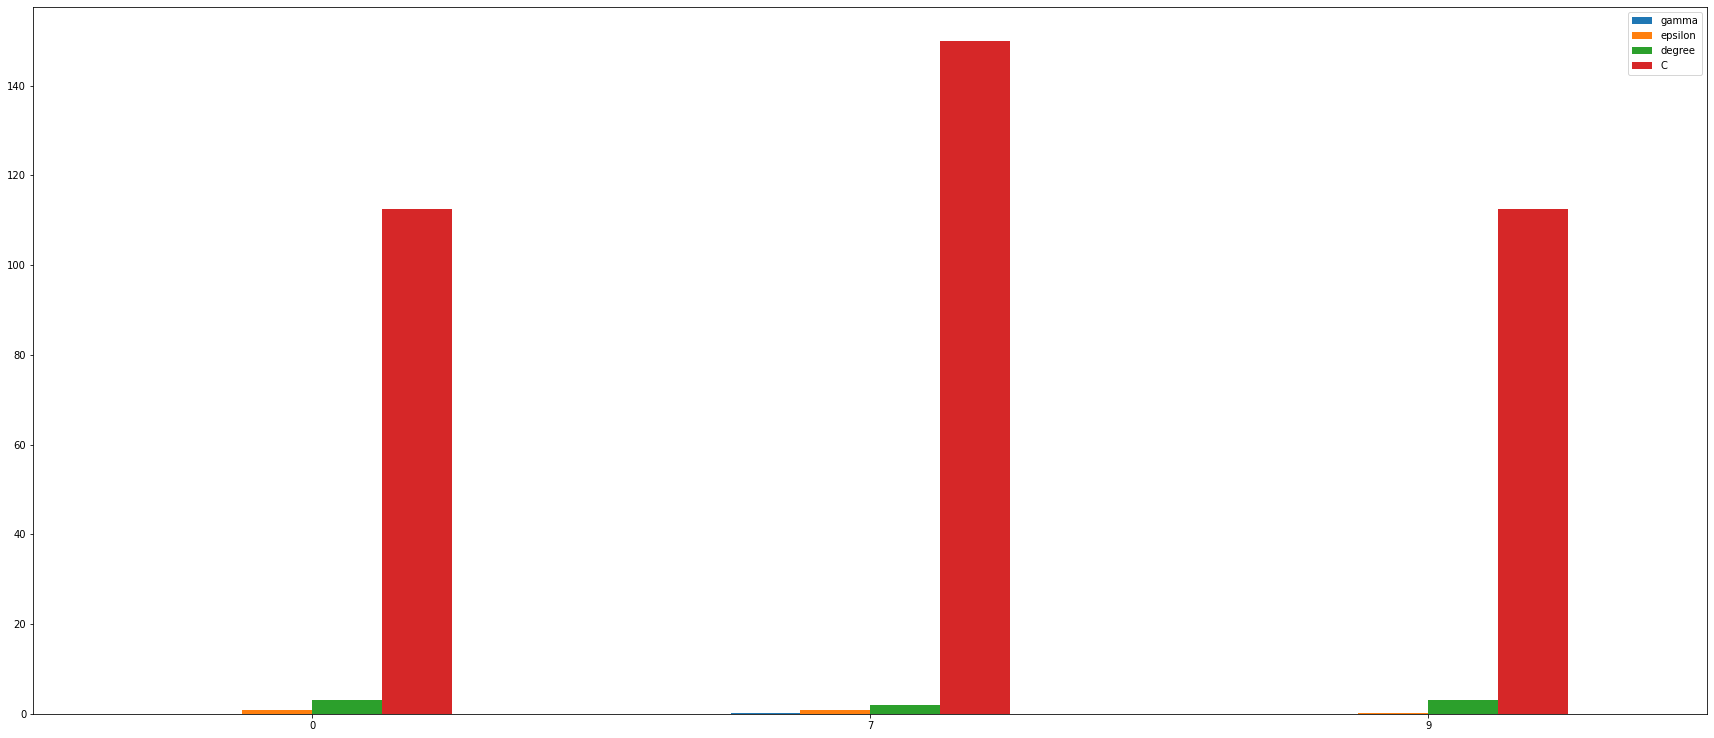

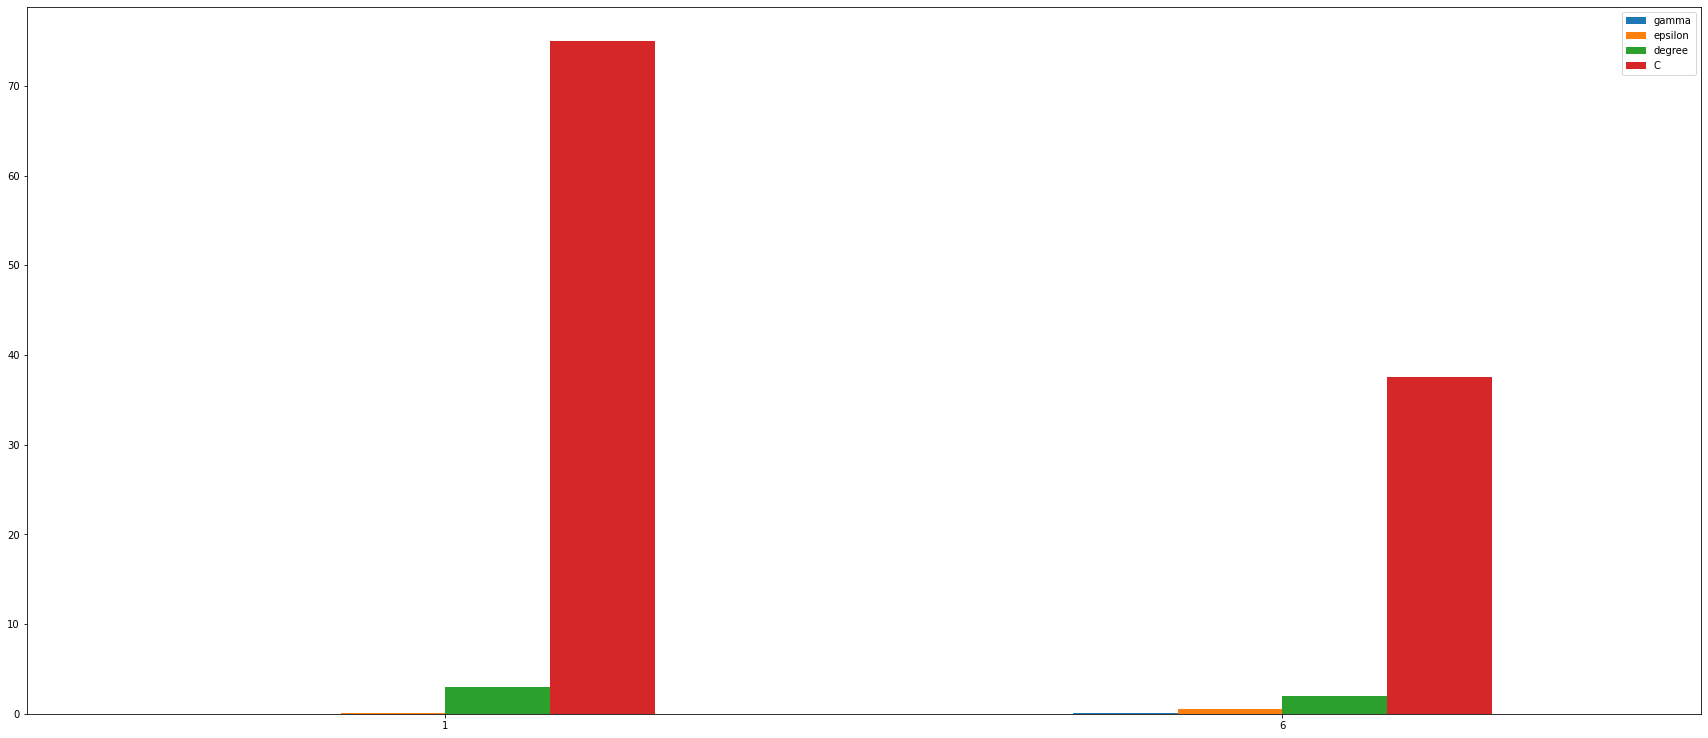

In [194]:
#ax3 = df_params_rand.plot.bar(rot=0, figsize=(30,13),xlabel='Combination', ylabel='Value', title='Params') 

ax =df_kernel_rand.plot.bar(rot=0, figsize=(30,13) ) 